# final
论文

## 滤波效果的比较
期待结果
1. 不同参数的var比较（Kalman, HP）
2. 选择一个作为最终的滤波器

(array([  1.,   0.,   0.,   1.,   2.,   6.,  17.,   8.,  24.,  18.]),
 array([ 0.89080176,  0.90340326,  0.91600476,  0.92860626,  0.94120776,
         0.95380926,  0.96641076,  0.97901226,  0.99161376,  1.00421526,
         1.01681676]),
 <a list of 10 Patch objects>)

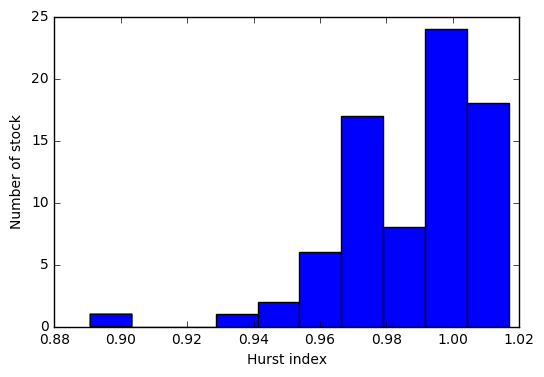

In [13]:
import numpy as np
hurstr = pd.read_csv('newtestmom\hurst.csv',index_col=0)
pylab.ylabel('Number of stock')
pylab.xlabel('Hurst index')
pylab.hist(m1roi['0'],bins=10)

In [11]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv("600006.XSHG.csv")
adfuller(df.close.values)

(-2.2565986615714881,
 0.18634788287465853,
 24,
 1673,
 {'1%': -3.4342647410953897,
  '10%': -2.5676905493244022,
  '5%': -2.8632691363350249},
 -582.51539475920026)

## 动量持续时间的比较
1. 取一个MACD作为最终比较对象
2. 对于100支股票尝试不同的动量窗口，对于不同的体量的股票给不同的动量值，当高于某值就入场 10-15
3. 统计所有动量，取25%和75%作为零界点
4. 测试效果16-17 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
from jy_strategy import Strategy, SMA, MACD, Param, Kalman, HP, Linear_Model,new_Kalman
from jy_center import Center_Param,Center
%matplotlib inline
from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (8, 6)

In [2]:
df = pd.read_csv("600006.XSHG.csv")
C = Center(Center_Param())
cap = pd.read_csv("capitalization11.csv")
p=Param([60,20],5,5)
C.choose_strategy(MACD("a", df,p))
C.run_test()
C.print_result()



60
real date:2009-12-31
money:631534.2800000003
cangwei:0
roi:-0.3684657199999997
alpha:0.155276411846
beta:0.739034684248
algorithem volatility: 3.21106104643
bench volatility: 3.09860878171
sharpe ratio: 0.27434380542
max drawdown: 0.6421014054005346
win ratio:0.08673835125448029
transfer times:32


'money:631534.2800000003\ncangwei:0\nroi:-0.3684657199999997\nalpha:0.155276411846\nbeta:0.739034684248\nalgorithem volatility: 3.21106104643\nbench volatility: 3.09860878171\nsharpe ratio: 0.27434380542\nmax drawdown: 0.6421014054005346\nwin ratio:0.08673835125448029\ntransfer times:32\n'

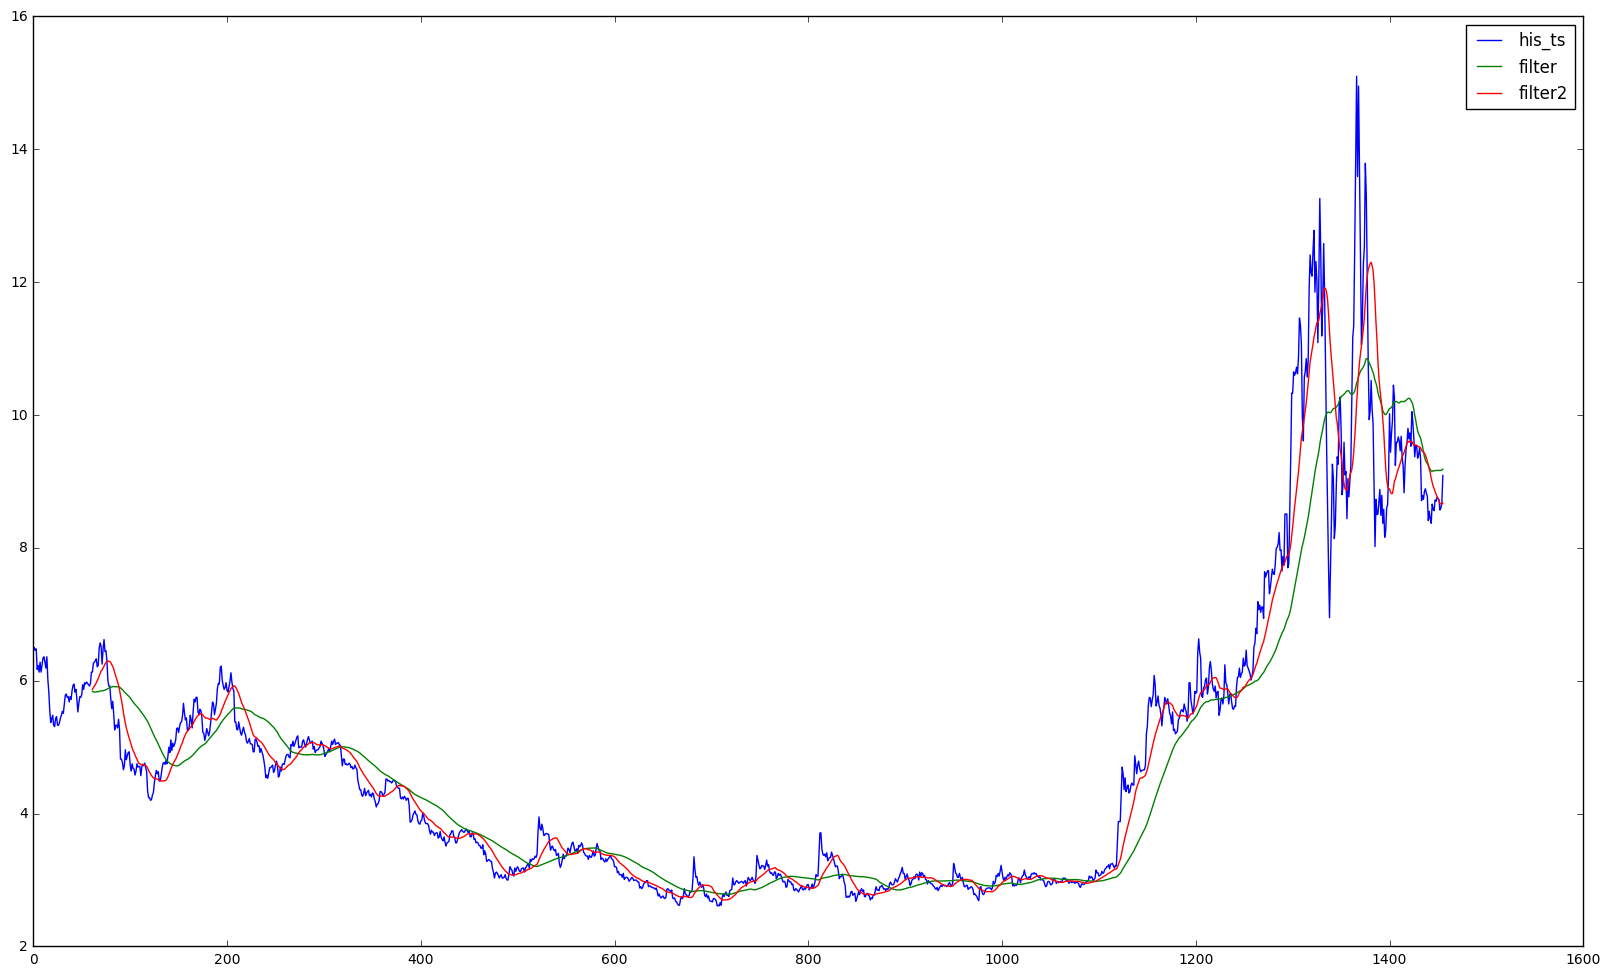

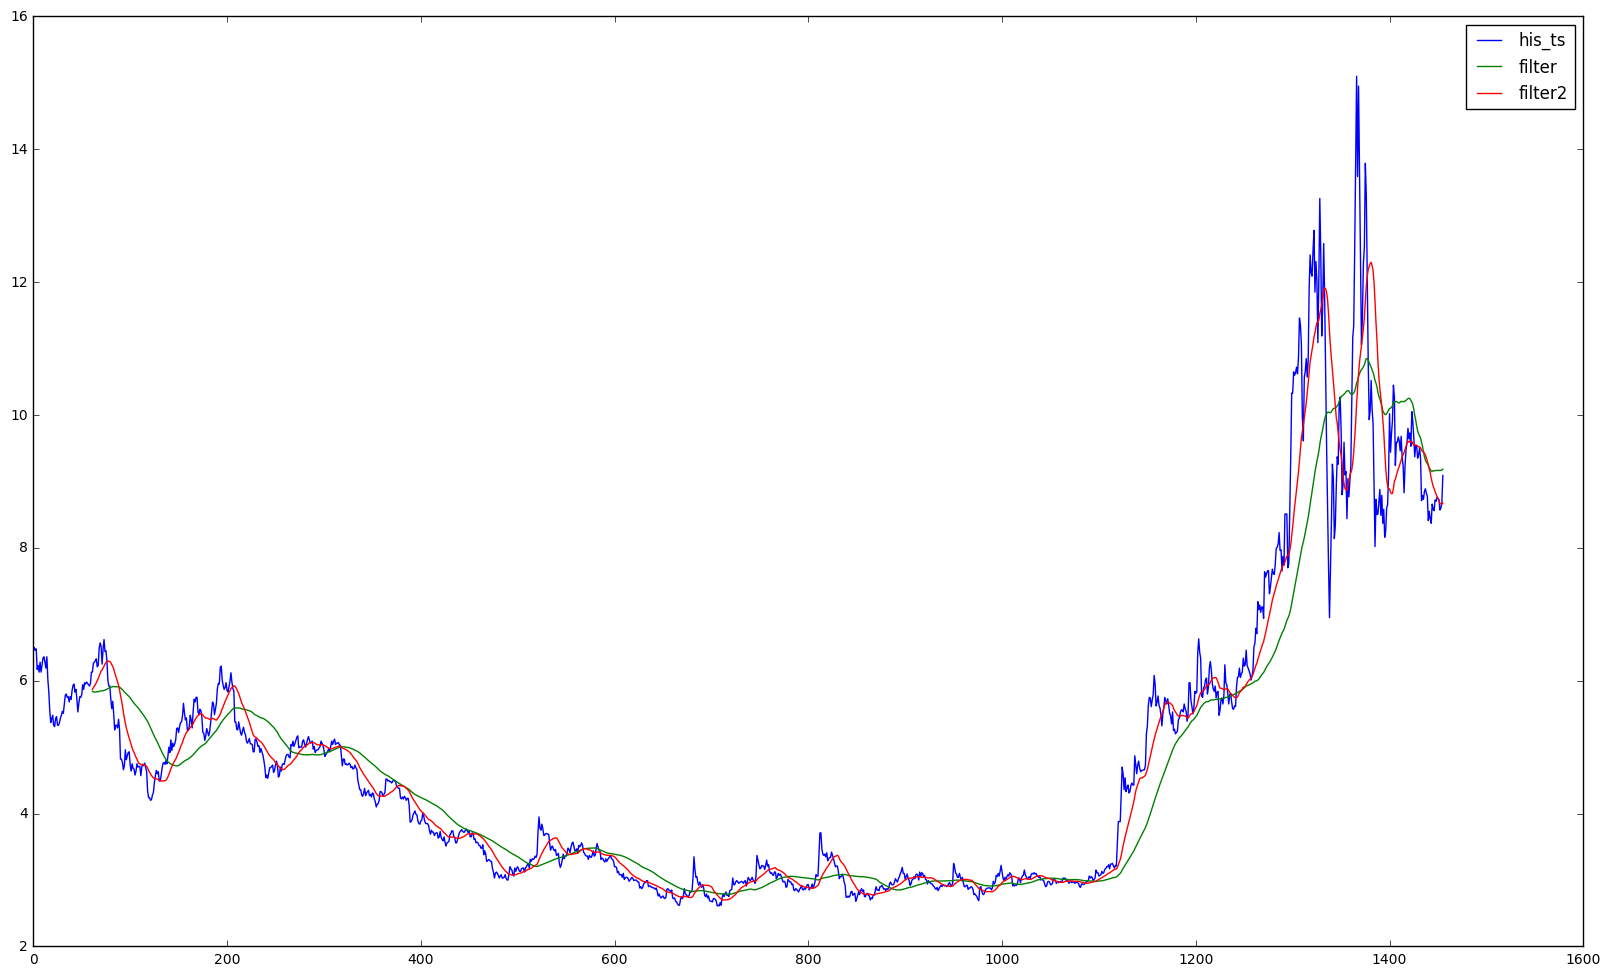

In [11]:
C.print_plot_filter()

real date:2009-12-31
money:1701745.0599999998
cangwei:0
roi:0.7017450599999998
alpha:-0.636637992146
beta:1.71223725611
algorithem volatility: 6.01925776968
bench volatility: 3.22398130464
sharpe ratio: 0.17572947756
max drawdown: 0.4160885127537289
win ratio:0.1887719298245614
transfer times:12
1425


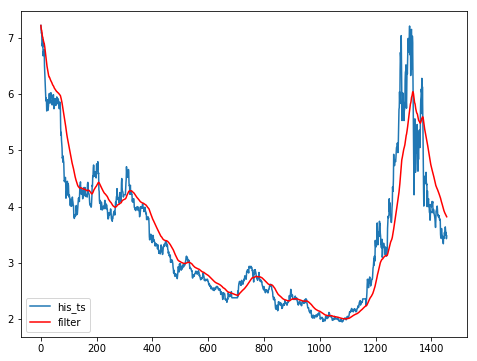

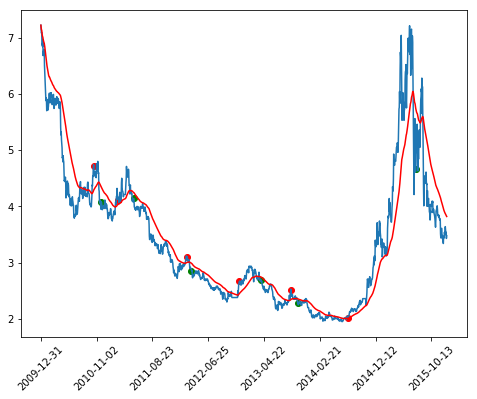

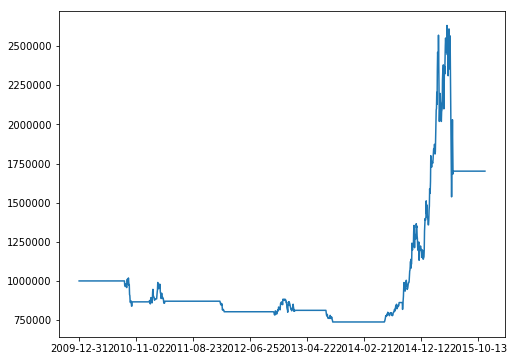

In [6]:
m5 = pd.read_csv("MOM_20.csv")
m5.shape
m5.columns=['index','time','600004.XSHG.csv', '600005.XSHG.csv', '600006.XSHG.csv', '600007.XSHG.csv', '600008.XSHG.csv', '600009.XSHG.csv', '600010.XSHG.csv', '600011.XSHG.csv', '600012.XSHG.csv', '600015.XSHG.csv', '600016.XSHG.csv', '600017.XSHG.csv', '600018.XSHG.csv', '600019.XSHG.csv', '600020.XSHG.csv', '600021.XSHG.csv', '600022.XSHG.csv', '600026.XSHG.csv', '600027.XSHG.csv', '600028.XSHG.csv', '600029.XSHG.csv', '600030.XSHG.csv', '600031.XSHG.csv', '600033.XSHG.csv', '600035.XSHG.csv', '600036.XSHG.csv', '600037.XSHG.csv', '600038.XSHG.csv', '600039.XSHG.csv', '600048.XSHG.csv', '600050.XSHG.csv', '600051.XSHG.csv', '600052.XSHG.csv', '600053.XSHG.csv', '600054.XSHG.csv', '600055.XSHG.csv', '600056.XSHG.csv', '600057.XSHG.csv', '600058.XSHG.csv', '600059.XSHG.csv', '600060.XSHG.csv', '600061.XSHG.csv', '600062.XSHG.csv', '600063.XSHG.csv', '600064.XSHG.csv', '600066.XSHG.csv', '600067.XSHG.csv', '600068.XSHG.csv', '600069.XSHG.csv', '600070.XSHG.csv', '600071.XSHG.csv', '600072.XSHG.csv', '600073.XSHG.csv', '600074.XSHG.csv', '600075.XSHG.csv', '600076.XSHG.csv', '600077.XSHG.csv', '600078.XSHG.csv', '600079.XSHG.csv', '600080.XSHG.csv', '600081.XSHG.csv', '600082.XSHG.csv', '600083.XSHG.csv', '600084.XSHG.csv', '600085.XSHG.csv', '600086.XSHG.csv', '600088.XSHG.csv', '600089.XSHG.csv', '600090.XSHG.csv', '600091.XSHG.csv', '600093.XSHG.csv', '600095.XSHG.csv', '600096.XSHG.csv', '600097.XSHG.csv', '600098.XSHG.csv', '600099.XSHG.csv', '600100.XSHG.csv']
mom75=pd.DataFrame(m5.time)
m75=[]
for i in m5.index:
    k=m5.ix[i,3:].values
    m75.append(np.percentile(k,75))
mom75=pd.concat([mom75,pd.DataFrame(m75,columns=['m75'])],axis=1)
f ='600005.XSHG.csv' 
cap = pd.read_csv("capitalization11.csv")
df = pd.read_csv("aaa/"+f)
C = Center(Center_Param())    
C.choose_strategy(new_Kalman("new k",df,f,cap))
C.current_strategy.MOM = 20
C.run_test_new(mom75)
C.print_result()
C.print_plot_filter()
C.print_trade_log_pic()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

In [3]:
m1 = pd.read_csv("MOM_1.csv")
m1.shape
m1.columns=['index','time','600004.XSHG.csv', '600005.XSHG.csv', '600006.XSHG.csv', '600007.XSHG.csv', '600008.XSHG.csv', '600009.XSHG.csv', '600010.XSHG.csv', '600011.XSHG.csv', '600012.XSHG.csv', '600015.XSHG.csv', '600016.XSHG.csv', '600017.XSHG.csv', '600018.XSHG.csv', '600019.XSHG.csv', '600020.XSHG.csv', '600021.XSHG.csv', '600022.XSHG.csv', '600026.XSHG.csv', '600027.XSHG.csv', '600028.XSHG.csv', '600029.XSHG.csv', '600030.XSHG.csv', '600031.XSHG.csv', '600033.XSHG.csv', '600035.XSHG.csv', '600036.XSHG.csv', '600037.XSHG.csv', '600038.XSHG.csv', '600039.XSHG.csv', '600048.XSHG.csv', '600050.XSHG.csv', '600051.XSHG.csv', '600052.XSHG.csv', '600053.XSHG.csv', '600054.XSHG.csv', '600055.XSHG.csv', '600056.XSHG.csv', '600057.XSHG.csv', '600058.XSHG.csv', '600059.XSHG.csv', '600060.XSHG.csv', '600061.XSHG.csv', '600062.XSHG.csv', '600063.XSHG.csv', '600064.XSHG.csv', '600066.XSHG.csv', '600067.XSHG.csv', '600068.XSHG.csv', '600069.XSHG.csv', '600070.XSHG.csv', '600071.XSHG.csv', '600072.XSHG.csv', '600073.XSHG.csv', '600074.XSHG.csv', '600075.XSHG.csv', '600076.XSHG.csv', '600077.XSHG.csv', '600078.XSHG.csv', '600079.XSHG.csv', '600080.XSHG.csv', '600081.XSHG.csv', '600082.XSHG.csv', '600083.XSHG.csv', '600084.XSHG.csv', '600085.XSHG.csv', '600086.XSHG.csv', '600088.XSHG.csv', '600089.XSHG.csv', '600090.XSHG.csv', '600091.XSHG.csv', '600093.XSHG.csv', '600095.XSHG.csv', '600096.XSHG.csv', '600097.XSHG.csv', '600098.XSHG.csv', '600099.XSHG.csv', '600100.XSHG.csv']
mom75=pd.DataFrame(m1.time)
m75=[]
for i in m1.index:
    k=m1.ix[i,3:].values
    m75.append(np.percentile(k,75))
mom75=pd.concat([mom75,pd.DataFrame(m75,columns=['m75'])],axis=1)

#h7=k[6]
#h5=k[5]

In [12]:
f = "600004.XSHG.csv"
df = pd.read_csv("aaa/"+f)
C = Center(Center_Param())
cap = pd.read_csv("capitalization11.csv")
C.choose_strategy(new_Kalman("new k",df,f,cap))
C.current_strategy.MOM = 1
C.run_test_new(mom75)
C.calculate_roi()

real date:2009-12-31


In [13]:
C.print_result()

money:6.710000000195578
cangwei:100334
roi:0.3846159100000004
alpha:-0.257011673287
beta:1.28919553792
algorithem volatility: 4.47216628776
bench volatility: 3.22398130464
sharpe ratio: 0.227798530897
max drawdown: 0.45560317916807397
win ratio:0.2617543859649123
transfer times:103


'money:6.710000000195578\ncangwei:100334\nroi:0.3846159100000004\nalpha:-0.257011673287\nbeta:1.28919553792\nalgorithem volatility: 4.47216628776\nbench volatility: 3.22398130464\nsharpe ratio: 0.227798530897\nmax drawdown: 0.45560317916807397\nwin ratio:0.2617543859649123\ntransfer times:103\n'

In [4]:
flist=['600004.XSHG.csv', '600005.XSHG.csv', '600006.XSHG.csv', '600007.XSHG.csv', '600008.XSHG.csv', '600009.XSHG.csv', '600010.XSHG.csv', '600011.XSHG.csv', '600012.XSHG.csv', '600015.XSHG.csv', '600016.XSHG.csv', '600017.XSHG.csv', '600018.XSHG.csv', '600019.XSHG.csv', '600020.XSHG.csv', '600021.XSHG.csv', '600022.XSHG.csv', '600026.XSHG.csv', '600027.XSHG.csv', '600028.XSHG.csv', '600029.XSHG.csv', '600030.XSHG.csv', '600031.XSHG.csv', '600033.XSHG.csv', '600035.XSHG.csv', '600036.XSHG.csv', '600037.XSHG.csv', '600038.XSHG.csv', '600039.XSHG.csv', '600048.XSHG.csv', '600050.XSHG.csv', '600051.XSHG.csv', '600052.XSHG.csv', '600053.XSHG.csv', '600054.XSHG.csv', '600055.XSHG.csv', '600056.XSHG.csv', '600057.XSHG.csv', '600058.XSHG.csv', '600059.XSHG.csv', '600060.XSHG.csv', '600061.XSHG.csv', '600062.XSHG.csv', '600063.XSHG.csv', '600064.XSHG.csv', '600066.XSHG.csv', '600067.XSHG.csv', '600068.XSHG.csv', '600069.XSHG.csv', '600070.XSHG.csv', '600071.XSHG.csv', '600072.XSHG.csv', '600073.XSHG.csv', '600074.XSHG.csv', '600075.XSHG.csv', '600076.XSHG.csv', '600077.XSHG.csv', '600078.XSHG.csv', '600079.XSHG.csv', '600080.XSHG.csv', '600081.XSHG.csv', '600082.XSHG.csv', '600083.XSHG.csv', '600084.XSHG.csv', '600085.XSHG.csv', '600086.XSHG.csv', '600088.XSHG.csv', '600089.XSHG.csv', '600090.XSHG.csv', '600091.XSHG.csv', '600093.XSHG.csv', '600095.XSHG.csv', '600096.XSHG.csv', '600097.XSHG.csv', '600098.XSHG.csv', '600099.XSHG.csv', '600100.XSHG.csv']
m1roi = []
cap = pd.read_csv("capitalization11.csv")
i = 0
for f in flist:
    df = pd.read_csv("aaa/"+f)
    C = Center(Center_Param())    
    C.choose_strategy(new_Kalman("new k",df,f,cap))
    C.current_strategy.MOM = 1
    C.run_test_new(mom75)
    m1roi.append(C.calculate_roi())
    i = i+1
    print(i)
m1roi = pd.DataFrame(m1roi)
m1roi.to_csv("m1roi.csv")

real date:2009-12-31
1
real date:2009-12-31
2
real date:2009-12-31
3
real date:2009-12-31
4
real date:2009-12-31
5
real date:2009-12-31
6
real date:2009-12-31
7
real date:2009-12-31
8
real date:2009-12-31
9
real date:2009-12-31
10
real date:2009-12-31
11
real date:2009-12-31
12
real date:2009-12-31
13
real date:2009-12-31
14
real date:2009-12-31
15
real date:2009-12-31
16
real date:2009-12-31
17
real date:2009-12-31
18
real date:2009-12-31
19
real date:2009-12-31
20
real date:2009-12-31
21
real date:2009-12-31
22
real date:2009-12-31
23
real date:2009-12-31
24
real date:2009-12-31
25
real date:2009-12-31
26
real date:2009-12-31
27
real date:2009-12-31
28
real date:2009-12-31
29
real date:2009-12-31
30
real date:2009-12-31
31
real date:2009-12-31
32
real date:2009-12-31
33
real date:2009-12-31
34
real date:2009-12-31
35
real date:2009-12-31
36
real date:2009-12-31
37
real date:2009-12-31
38
real date:2009-12-31
39
real date:2009-12-31
40
real date:2009-12-31
41
real date:2009-12-31
42
r

In [ ]:
m5 = pd.read_csv("MOM_5.csv")
m5.shape
m5.columns=['index','time','600004.XSHG.csv', '600005.XSHG.csv', '600006.XSHG.csv', '600007.XSHG.csv', '600008.XSHG.csv', '600009.XSHG.csv', '600010.XSHG.csv', '600011.XSHG.csv', '600012.XSHG.csv', '600015.XSHG.csv', '600016.XSHG.csv', '600017.XSHG.csv', '600018.XSHG.csv', '600019.XSHG.csv', '600020.XSHG.csv', '600021.XSHG.csv', '600022.XSHG.csv', '600026.XSHG.csv', '600027.XSHG.csv', '600028.XSHG.csv', '600029.XSHG.csv', '600030.XSHG.csv', '600031.XSHG.csv', '600033.XSHG.csv', '600035.XSHG.csv', '600036.XSHG.csv', '600037.XSHG.csv', '600038.XSHG.csv', '600039.XSHG.csv', '600048.XSHG.csv', '600050.XSHG.csv', '600051.XSHG.csv', '600052.XSHG.csv', '600053.XSHG.csv', '600054.XSHG.csv', '600055.XSHG.csv', '600056.XSHG.csv', '600057.XSHG.csv', '600058.XSHG.csv', '600059.XSHG.csv', '600060.XSHG.csv', '600061.XSHG.csv', '600062.XSHG.csv', '600063.XSHG.csv', '600064.XSHG.csv', '600066.XSHG.csv', '600067.XSHG.csv', '600068.XSHG.csv', '600069.XSHG.csv', '600070.XSHG.csv', '600071.XSHG.csv', '600072.XSHG.csv', '600073.XSHG.csv', '600074.XSHG.csv', '600075.XSHG.csv', '600076.XSHG.csv', '600077.XSHG.csv', '600078.XSHG.csv', '600079.XSHG.csv', '600080.XSHG.csv', '600081.XSHG.csv', '600082.XSHG.csv', '600083.XSHG.csv', '600084.XSHG.csv', '600085.XSHG.csv', '600086.XSHG.csv', '600088.XSHG.csv', '600089.XSHG.csv', '600090.XSHG.csv', '600091.XSHG.csv', '600093.XSHG.csv', '600095.XSHG.csv', '600096.XSHG.csv', '600097.XSHG.csv', '600098.XSHG.csv', '600099.XSHG.csv', '600100.XSHG.csv']
mom75=pd.DataFrame(m1.time)
m75=[]
for i in m1.index:
    k=m1.ix[i,3:].values
    m75.append(np.percentile(k,75))
mom75=pd.concat([mom75,pd.DataFrame(m75,columns=['m75'])],axis=1)


In [ ]:
m1roi = []
cap = pd.read_csv("capitalization11.csv")
i = 0
for f in flist:
    df = pd.read_csv("aaa/"+f)
    C = Center(Center_Param())    
    C.choose_strategy(new_Kalman("new k",df,f,cap))
    C.current_strategy.MOM = 5
    C.run_test_new(mom75)
    m1roi.append(C.calculate_roi())
    i = i+1
    print(i)
m1roi = pd.DataFrame(m1roi)
m1roi.to_csv("m5roi.csv")

real date:2009-12-31
1


,0
count,77.000000
mean,0.778214
std,1.038938
min,-0.327578
25%,0.140910
50%,0.453187
75%,0.954322
max,5.266892


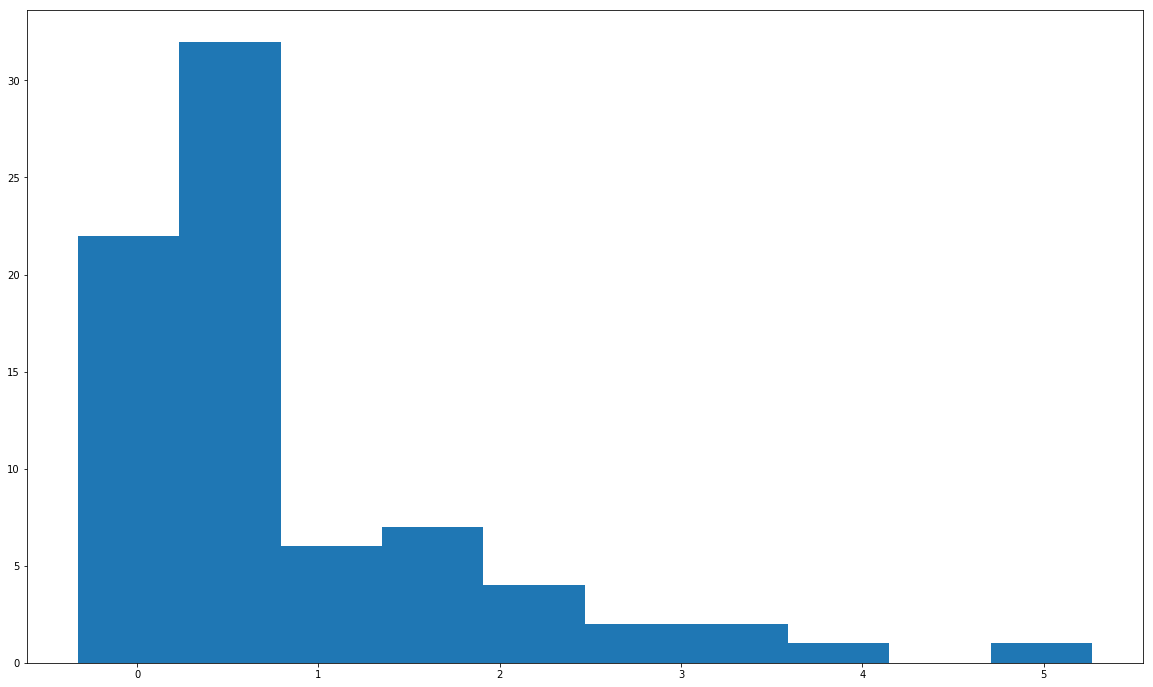

In [18]:
m1roi = pd.read_csv('m1roi.csv',index_col=0)
pylab.hist(m1roi['0'],bins=10)
m1roi.describe()

,0
count,77.000000
mean,0.636304
std,0.925879
min,-0.456535
25%,-0.018945
50%,0.378457
75%,0.934254
max,4.074354


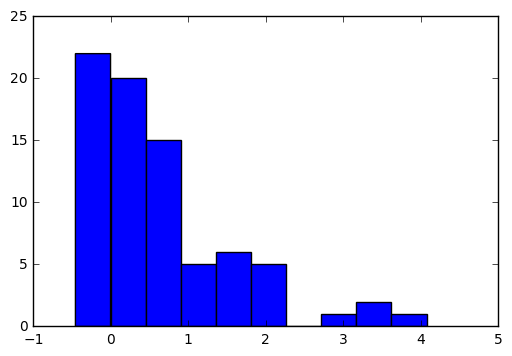

In [3]:
m1roi = pd.read_csv('m1roi.csv',index_col=0)
m5roi = pd.read_csv('m5roi.csv',index_col=0)
m10roi = pd.read_csv('m10roi.csv',index_col=0)
m15roi = pd.read_csv('m15roi.csv',index_col=0)
m20roi = pd.read_csv('m20roi.csv',index_col=0)
m25roi = pd.read_csv('m25roi.csv',index_col=0)
m30roi = pd.read_csv('m30roi.csv',index_col=0)
m60roi = pd.read_csv('m60roi.csv',index_col=0)

pylab.hist(m5roi['0'],bins=10)
m5roi.describe()

In [5]:
stats.ttest_ind(m1roi['0'], m5roi['0']) 
m1roi[m1roi<0].count()

0    14
dtype: int64

c:\python34\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


,1,5,10,15,20,25,30,60
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.778214,0.636304,0.509157,0.354962,0.344475,0.411521,0.426545,0.342187
std,1.038938,0.925879,0.847530,0.672836,0.587540,0.772601,0.791243,0.627273
min,-0.327578,-0.456535,-0.541598,-0.632688,-0.733295,-0.566827,-0.493437,-0.723938
25%,0.140910,-0.018945,-0.014006,-0.075257,-0.118548,-0.091637,-0.067095,-0.102459
50%,0.453187,0.378457,0.240053,0.201831,0.254139,0.276116,0.274635,0.328418
75%,0.954322,0.934254,0.813493,0.649900,0.701745,0.630098,0.759972,0.627479
max,5.266892,4.074354,4.007051,3.063146,2.015070,4.931768,5.035747,3.609908


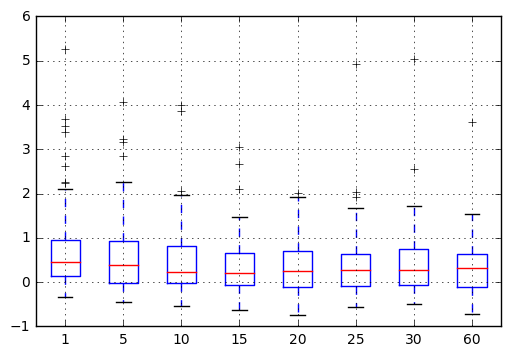

In [4]:
result = pd.concat([m1roi,m5roi ,m10roi,m15roi,m20roi,m25roi,m30roi,m60roi],axis=1,)
result.columns=['1','5','10','15','20','25','30','60']
result.boxplot()
result.describe()

               1          5         10         15         20         25  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean    0.006654   0.010235   0.038797   0.033388   0.056812   0.047610   
std     0.292217   0.268149   0.261084   0.263674   0.286845   0.274524   
min    -0.343279  -0.364255  -0.346926  -0.361339  -0.285769  -0.267264   
25%    -0.157993  -0.127686  -0.097788  -0.118489  -0.103134  -0.120944   
50%    -0.020474  -0.033339  -0.027411  -0.022046  -0.016955  -0.022974   
75%     0.053113   0.084322   0.107054   0.071294   0.120613   0.105570   
max     1.836661   1.461744   1.456000   1.439577   1.524183   1.514378   

              30         60      60-20       20-5  
count  77.000000  77.000000  77.000000  77.000000  
mean    0.057601   0.082822   0.003342   0.019112  
std     0.288025   0.317422   0.220384   0.252596  
min    -0.265605  -0.177631  -0.255430  -0.288141  
25%    -0.096977  -0.054938  -0.114917  -0.111543  
50%    -0.00

1        48
5        41
10       43
15       41
20       43
25       46
30       42
60       35
60-20    45
20-5     42
dtype: int64

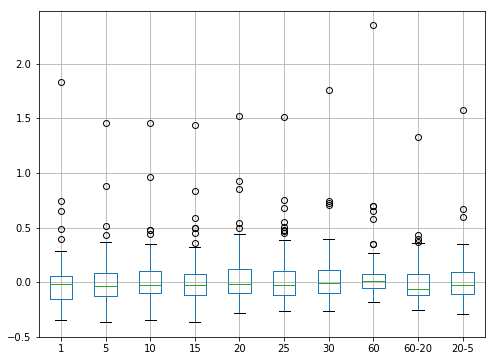

In [21]:
tm1roi =  pd.read_csv('tm1roi.csv',index_col=0)
tm5roi =  pd.read_csv('tm5roi.csv',index_col=0)
tm10roi = pd.read_csv('tm10roi.csv',index_col=0)
tm15roi = pd.read_csv('tm15roi.csv',index_col=0)
tm20roi = pd.read_csv('tm20roi.csv',index_col=0)
tm25roi = pd.read_csv('tm25roi.csv',index_col=0)
tm30roi = pd.read_csv('tm30roi.csv',index_col=0)
tm60roi = pd.read_csv('tm60roi.csv',index_col=0)
tm11roi =  pd.read_csv('newtestmom/MACD_60_20_roi2016-01-04_2016-12-30.csv',index_col=0)
tm55roi =  pd.read_csv('newtestmom/MACD_20_5_roi2016-01-04_2016-12-30.csv',index_col=0)
result = pd.concat([tm1roi,tm5roi ,tm10roi,tm15roi,tm20roi,tm25roi,tm30roi,tm60roi,tm11roi,tm55roi],axis=1,)
result.columns=['1','5','10','15','20','25','30','60','60-20','20-5']
result.boxplot()
print(result.describe())
result[result<0].count()

0    26
dtype: int64
0    26
dtype: int64


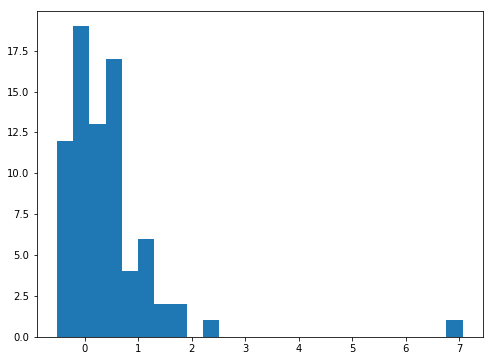

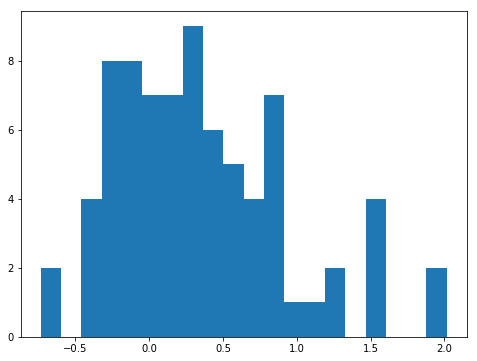

In [3]:
macd = pd.read_csv("MACD_60_20_roi_training.csv",index_col=0)
mom = pd.read_csv("m20roi.csv",index_col=0)
#macd['0']
pylab.hist(macd['0'].values,bins=25)
pylab.figure()
pylab.hist(mom['0'].values,bins=20)
#result = pd.concat([macd,mom])
print(macd[macd<0].count())
print(mom[mom<0].count())
#result.columns=['macd','mom']


               1          5         10         15         20         25  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean    0.023839   0.002573  -0.006463  -0.027090  -0.031593  -0.036593   
std     0.312529   0.285716   0.280097   0.263441   0.260368   0.256672   
min    -0.313810  -0.420511  -0.372083  -0.369626  -0.404868  -0.428627   
25%    -0.149123  -0.155970  -0.174322  -0.187131  -0.177470  -0.173865   
50%    -0.054223  -0.082365  -0.091925  -0.074543  -0.102207  -0.096871   
75%     0.059497   0.097148   0.057272   0.032199   0.069705   0.051172   
max     1.647503   1.425887   1.524970   1.340607   1.240912   1.292879   

              30         60      60-20       20-5  
count  77.000000  77.000000  77.000000  77.000000  
mean   -0.048123  -0.080468  -0.055361   0.049710  
std     0.253778   0.249602   0.228852   0.258850  
min    -0.493509  -0.506783  -0.435942  -0.395295  
25%    -0.161745  -0.228199  -0.196035  -0.090608  
50%    -0.09

1        49
5        51
10       50
15       52
20       53
25       55
30       54
60       58
60-20    55
20-5     44
dtype: int64

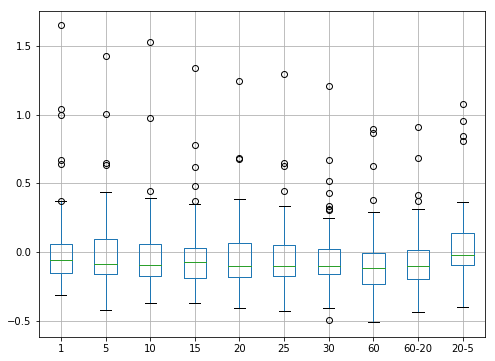

In [18]:
tm1roi =  pd.read_csv('newtestmom/m1roi_2010-01-01_2011-01-01.csv',index_col=0)
tm5roi =  pd.read_csv('newtestmom/m5roi_2010-01-01_2011-01-01.csv',index_col=0)
tm10roi = pd.read_csv('newtestmom/m10roi_2010-01-01_2011-01-01.csv',index_col=0)
tm15roi = pd.read_csv('newtestmom/m15roi_2010-01-01_2011-01-01.csv',index_col=0)
tm20roi = pd.read_csv('newtestmom/m20roi_2010-01-01_2011-01-01.csv',index_col=0)
tm25roi = pd.read_csv('newtestmom/m25roi_2010-01-01_2011-01-01.csv',index_col=0)
tm30roi = pd.read_csv('newtestmom/m30roi_2010-01-01_2011-01-01.csv',index_col=0)
tm60roi = pd.read_csv('newtestmom/m60roi_2010-01-01_2011-01-01.csv',index_col=0)
tm11roi =  pd.read_csv('newtestmom/MACD_60_20_roi2010-01-01_2011-01-01.csv',index_col=0)
tm55roi =  pd.read_csv('newtestmom/MACD_20_5_roi2010-01-01_2011-01-01.csv',index_col=0)
result = pd.concat([tm1roi,tm5roi ,tm10roi,tm15roi,tm20roi,tm25roi,tm30roi,tm60roi,tm11roi,tm55roi],axis=1,)
result.columns=['1','5','10','15','20','25','30','60','60-20','20-5']
result.boxplot()
print(result.describe())
result[result<0].count()

               1          5         10         15         20         25  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean   -0.137595  -0.168592  -0.145734  -0.170353  -0.184774  -0.188865   
std     0.217049   0.246088   0.260299   0.248928   0.263318   0.240105   
min    -0.563479  -0.581841  -0.546805  -0.602536  -0.669532  -0.674121   
25%    -0.277573  -0.341636  -0.331938  -0.313449  -0.329337  -0.350454   
50%    -0.143689  -0.193712  -0.173156  -0.202751  -0.210884  -0.196611   
75%    -0.011705  -0.071054  -0.048110  -0.080215  -0.089714  -0.091200   
max     0.533856   0.646967   0.760654   0.662923   0.568899   0.481999   

              30         60      60-20       20-5  
count  77.000000  77.000000  77.000000  77.000000  
mean   -0.204356  -0.186322  -0.199043  -0.019100  
std     0.228012   0.214052   0.226178   0.342778  
min    -0.651077  -0.612747  -0.565740  -0.468721  
25%    -0.385286  -0.307698  -0.364048  -0.252976  
50%    -0.22

1        59
5        66
10       61
15       63
20       62
25       62
30       64
60       64
60-20    59
20-5     48
dtype: int64

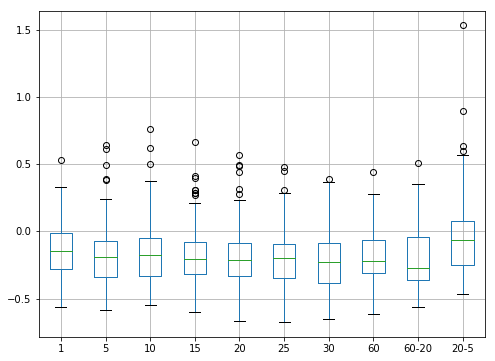

In [19]:
tm1roi =  pd.read_csv('newtestmom/m1roi_2011-01-01_2014-01-01.csv',index_col=0)
tm5roi =  pd.read_csv('newtestmom/m5roi_2011-01-01_2014-01-01.csv',index_col=0)
tm10roi = pd.read_csv('newtestmom/m10roi_2011-01-01_2014-01-01.csv',index_col=0)
tm15roi = pd.read_csv('newtestmom/m15roi_2011-01-01_2014-01-01.csv',index_col=0)
tm20roi = pd.read_csv('newtestmom/m20roi_2011-01-01_2014-01-01.csv',index_col=0)
tm25roi = pd.read_csv('newtestmom/m25roi_2011-01-01_2014-01-01.csv',index_col=0)
tm30roi = pd.read_csv('newtestmom/m30roi_2011-01-01_2014-01-01.csv',index_col=0)
tm60roi = pd.read_csv('newtestmom/m60roi_2011-01-01_2014-01-01.csv',index_col=0)
tm11roi =  pd.read_csv('newtestmom/MACD_60_20_roi2011-01-01_2014-01-01.csv',index_col=0)
tm55roi =  pd.read_csv('newtestmom/MACD_20_5_roi2011-01-01_2014-01-01.csv',index_col=0)
result = pd.concat([tm1roi,tm5roi ,tm10roi,tm15roi,tm20roi,tm25roi,tm30roi,tm60roi,tm11roi,tm55roi],axis=1,)
result.columns=['1','5','10','15','20','25','30','60','60-20','20-5']
result.boxplot()
print(result.describe())
result[result<0].count()

               1          5         10         15         20         25  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean    1.083966   0.999026   0.862353   0.805556   0.836929   0.889810   
std     1.251110   1.247978   1.255358   1.159634   1.031999   1.010443   
min    -0.065876  -0.194209  -0.464749  -0.449110  -0.266501  -0.188201   
25%     0.418830   0.367447   0.215284   0.196724   0.187821   0.286098   
50%     0.781825   0.653238   0.602794   0.577963   0.637304   0.675830   
75%     1.309131   1.285889   1.169006   1.071886   1.143749   1.197691   
max     8.583817   9.134334   9.569150   8.669632   7.341820   7.327803   

              30         60      60-20       20-5  
count  77.000000  77.000000  77.000000  77.000000  
mean    0.975011   0.862106   0.935658   0.919880  
std     1.012197   0.989572   1.172871   1.067190  
min    -0.150966  -0.312666  -0.337021  -0.179058  
25%     0.382404   0.343172   0.280650   0.279253  
50%     0.73

1         2
5         7
10        7
15        9
20       11
25        6
30        3
60        3
60-20     5
20-5      8
dtype: int64

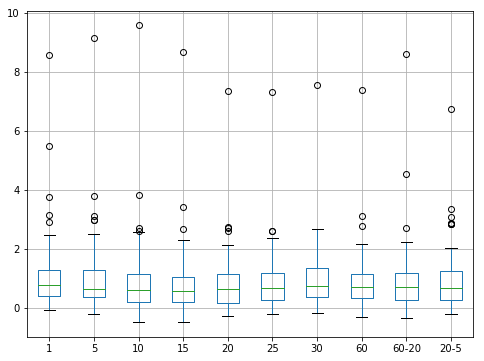

In [20]:
tm1roi =  pd.read_csv('newtestmom/m1roi_2014-01-01_2015-12-30.csv',index_col=0)
tm5roi =  pd.read_csv('newtestmom/m5roi_2014-01-01_2015-12-30.csv',index_col=0)
tm10roi = pd.read_csv('newtestmom/m10roi_2014-01-01_2015-12-30.csv',index_col=0)
tm15roi = pd.read_csv('newtestmom/m15roi_2014-01-01_2015-12-30.csv',index_col=0)
tm20roi = pd.read_csv('newtestmom/m20roi_2014-01-01_2015-12-30.csv',index_col=0)
tm25roi = pd.read_csv('newtestmom/m25roi_2014-01-01_2015-12-30.csv',index_col=0)
tm30roi = pd.read_csv('newtestmom/m30roi_2014-01-01_2015-12-30.csv',index_col=0)
tm60roi = pd.read_csv('newtestmom/m60roi_2014-01-01_2015-12-30.csv',index_col=0)
tm11roi =  pd.read_csv('newtestmom/MACD_60_20_roi2014-01-01_2015-12-30.csv',index_col=0)
tm55roi =  pd.read_csv('newtestmom/MACD_20_5_roi2014-01-01_2015-12-30.csv',index_col=0)
result = pd.concat([tm1roi,tm5roi ,tm10roi,tm15roi,tm20roi,tm25roi,tm30roi,tm60roi,tm11roi,tm55roi],axis=1,)
result.columns=['1','5','10','15','20','25','30','60','60-20','20-5']
result.boxplot()
print(result.describe())
result[result<0].count()

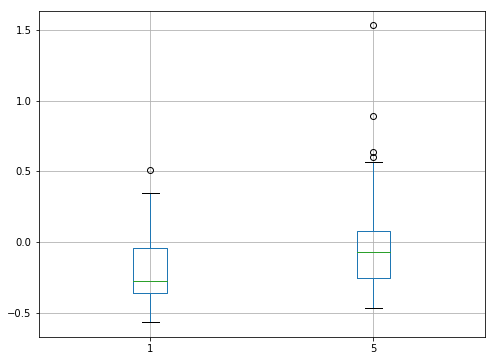

In [14]:


result = pd.concat([tm1roi,tm5roi ],axis=1,)
result.columns=['1','5']
result.boxplot()

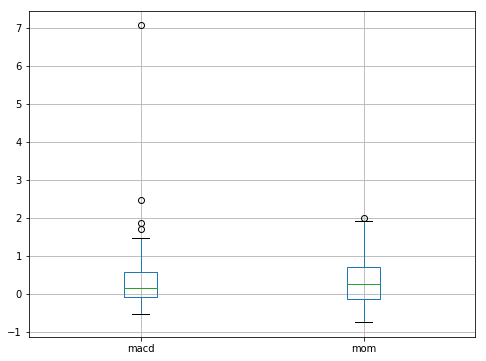

In [9]:
result = pd.concat([macd,mom],axis=1)
#result
result.columns=['macd','mom']

result.boxplot()

In [10]:
result.describe()

,macd,mom
count,77.000000,77.000000
mean,0.419300,0.344475
std,0.969093,0.587540
min,-0.519284,-0.733295
25%,-0.080456,-0.118548
50%,0.170898,0.254139
75%,0.582790,0.701745
max,7.069193,2.015070
